In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [2]:
df=pd.read_csv('adult_with_headers.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

## Statistical Info

In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Removing Outliers using Isolation Forest Algorithm

In [7]:
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [8]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

In [9]:
isolation_forest.fit(df[numerical_features])

IsolationForest(contamination=0.05, random_state=42)

In [10]:
outliers = isolation_forest.predict(df[numerical_features])

In [11]:
df_filtered = df[outliers == 1]

In [12]:
print("Original Dataset Shape:", df.shape)
print("Filtered Dataset Shape:", df_filtered.shape)

Original Dataset Shape: (32561, 15)
Filtered Dataset Shape: (30933, 15)


## Replacing '?'with 'NA'

In [13]:
df_filtered.replace('?', pd.NA, inplace=True)

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\4217583851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.replace('?', pd.NA, inplace=True)


In [14]:
df_filtered.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [15]:
df_filtered.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Adding a new feature

In [16]:
df_filtered['capital_gain_income_ratio'] = df_filtered['capital_gain'] / df_filtered['fnlwgt']

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\909178688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['capital_gain_income_ratio'] = df_filtered['capital_gain'] / df_filtered['fnlwgt']


##### With these additional features, we have enriched the dataset by incorporating information related to the ratio of capital gain to income. This feature could potentially provide more insights and improve the performance of machine learning models. 

## Scaling numerical columns

In [17]:
SS=StandardScaler()
MMS=MinMaxScaler()

In [45]:
df_filtered['age']=SS.fit_transform(df_filtered[['age']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\270461359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age']=SS.fit_transform(df_filtered[['age']])


In [19]:
df_filtered['capital_gain_1']=SS.fit_transform(df_filtered[['capital_gain']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\285611618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['capital_gain_1']=SS.fit_transform(df_filtered[['capital_gain']])


In [20]:
df_filtered['capital_loss_1']=SS.fit_transform(df_filtered[['capital_loss']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\1741264281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['capital_loss_1']=SS.fit_transform(df_filtered[['capital_loss']])


In [21]:
df_filtered['hours_per_week']=SS.fit_transform(df_filtered[['hours_per_week']])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\3174312457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hours_per_week']=SS.fit_transform(df_filtered[['hours_per_week']])


###### Standard Scaling: Preferable when the features have a normal distribution or when the algorithm being used assumes standardization of data, like SVM.
###### Min-Max Scaling: Suitable when the algorithm or the context requires features to be within a specific range, for example, when dealing with image data or neural networks.

## Encoding Categorical Columns

In [22]:
df_filtered['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
df_filtered['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [24]:
df_filtered['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
df_filtered['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [26]:
df_filtered['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [27]:
df_filtered['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' England', ' Germany', ' Iran',
       ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Canada', ' Ecuador', ' Laos', ' Taiwan', ' Haiti',
       ' Portugal', ' Dominican-Republic', ' El-Salvador', ' France',
       ' Honduras', ' Guatemala', ' Japan', ' Yugoslavia', ' China',
       ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary'], dtype=object)

In [28]:
df_filtered['workclass']=LabelEncoder().fit_transform(df_filtered[['workclass']])

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\1156008599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['workclass']=LabelEncoder().fit_transform(df_filtered[['workclass']])


In [29]:
df_filtered['marital_status']=LabelEncoder().fit_transform(df_filtered[['marital_status']])

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\1111552561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['marital_status']=LabelEncoder().fit_transform(df_filtered[['marital_status']])


In [30]:
df_filtered['occupation']=LabelEncoder().fit_transform(df_filtered[['occupation']])

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\2290544401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['occupation']=LabelEncoder().fit_transform(df_filtered[['occupation']])


In [31]:
df_filtered['native_country']=LabelEncoder().fit_transform(df_filtered[['native_country']])

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\3443028634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['native_country']=LabelEncoder().fit_transform(df_filtered[['native_country']])


In [32]:
df_filtered['relationship']=LabelEncoder().fit_transform(df_filtered[['relationship']])

C:\Users\Varun Sayam\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\1858610578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['relationship']=LabelEncoder().fit_transform(df_filtered[['relationship']])


In [33]:
df_filtered['race']=OneHotEncoder().fit_transform(df_filtered[['race']]).toarray()

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\498131961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['race']=OneHotEncoder().fit_transform(df_filtered[['race']]).toarray()


In [34]:
df_filtered['sex']=OneHotEncoder().fit_transform(df_filtered[['sex']]).toarray()

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\120561341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sex']=OneHotEncoder().fit_transform(df_filtered[['sex']]).toarray()


In [35]:
df_filtered['income']=OneHotEncoder().fit_transform(df_filtered[['income']]).toarray()

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\3306587335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income']=OneHotEncoder().fit_transform(df_filtered[['income']]).toarray()


##### Label Encoding and One-Hot Encoding depends on the nature of the categorical variables, the machine learning algorithm being used, and the specific requirements of the task. Label Encoding is suitable for ordinal categorical variables and reduces dimensionality, while One-Hot Encoding is ideal for nominal categorical variables and preserves all information but may lead to a dimensionality explosion.

In [36]:
df_filtered.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_income_ratio,capital_gain_1,capital_loss_1
0,0.065552,7,77516,Bachelors,13,4,1,1,0.0,0.0,2174,0,-0.015857,38,1.0,0.028046,0.802234,-0.137265
1,0.893649,6,83311,Bachelors,13,2,4,0,0.0,0.0,0,0,-2.341797,38,1.0,0.000000,-0.233277,-0.137265
2,-0.009730,4,215646,HS-grad,9,0,6,1,0.0,0.0,0,0,-0.015857,38,1.0,0.000000,-0.233277,-0.137265
3,1.119494,4,234721,11th,7,2,6,0,0.0,0.0,0,0,-0.015857,38,1.0,0.000000,-0.233277,-0.137265
4,-0.762546,4,338409,Bachelors,13,2,10,5,0.0,1.0,0,0,-0.015857,5,1.0,0.000000,-0.233277,-0.137265


## Dropping Columns

In [37]:
df_filtered.drop('capital_gain',axis=1,inplace=True)
df_filtered.drop('capital_loss',axis=1,inplace=True)
df_filtered.drop('education',axis=1,inplace=True)

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\2520156286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('capital_gain',axis=1,inplace=True)
C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\2520156286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('capital_loss',axis=1,inplace=True)
C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\2520156286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [38]:
df_filtered.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_gain_income_ratio,capital_gain_1,capital_loss_1
0,0.065552,7,77516,13,4,1,1,0.0,0.0,-0.015857,38,1.0,0.028046,0.802234,-0.137265
1,0.893649,6,83311,13,2,4,0,0.0,0.0,-2.341797,38,1.0,0.000000,-0.233277,-0.137265
2,-0.009730,4,215646,9,0,6,1,0.0,0.0,-0.015857,38,1.0,0.000000,-0.233277,-0.137265
3,1.119494,4,234721,7,2,6,0,0.0,0.0,-0.015857,38,1.0,0.000000,-0.233277,-0.137265
4,-0.762546,4,338409,13,2,10,5,0.0,1.0,-0.015857,5,1.0,0.000000,-0.233277,-0.137265


## Using LOG transformation

In [39]:
 df_filtered['capital_gain_1'].skew()

5.289272023210637

In [40]:
df_filtered['log_capital_gain_1'] = np.log1p(df_filtered['capital_gain_1'])

C:\Users\Varun Sayam\AppData\Local\Temp\ipykernel_16836\1125309079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_capital_gain_1'] = np.log1p(df_filtered['capital_gain_1'])


In [41]:
df_filtered['log_capital_gain_1'].skew()

3.8621551884639698

###### The 'capital_gain' feature often exhibits high skewness because it contains many zero values and a few very high values, creating a long right tail.

## Correlation

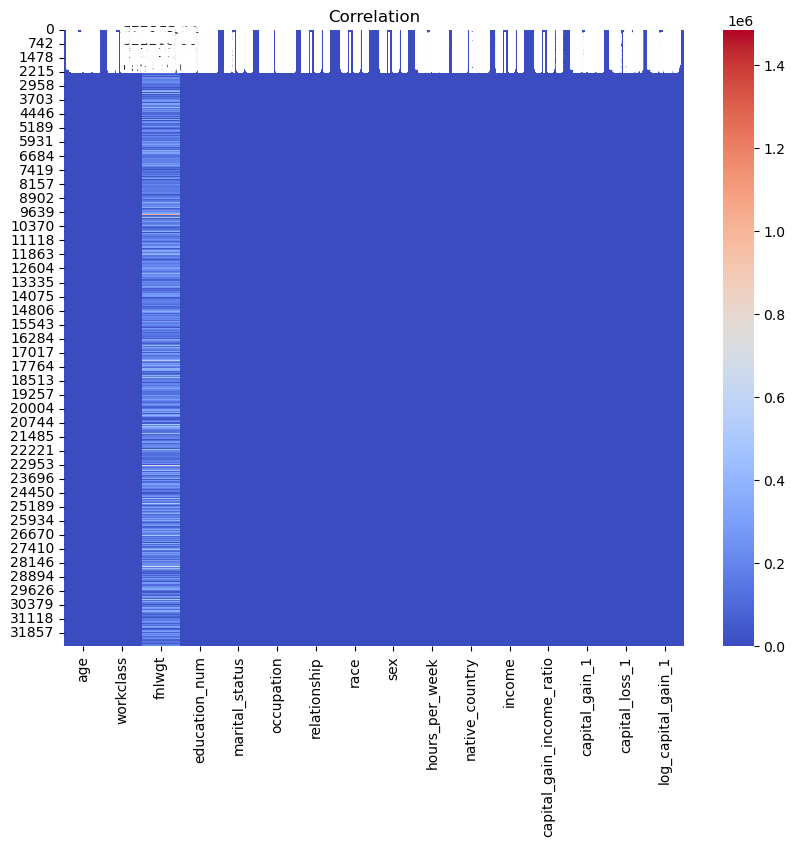

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()